# Statistics review 5: Comparison of means

R code accompanying [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC137324/pdf/cc1548.pdf)

## Key learning points

- The T test

In [1]:
suppressPackageStartupMessages(library(tidyverse))
library(pwr)

In [141]:
options(repr.plot.width=4, repr.plot.height=3)

## Comparison of a single mean with a hypothesized value

In [2]:
hb <- c(8.1, 10.1, 12.3, 9.7, 11.7, 11.3,
        11.9, 9.3, 13.0, 10.5, 8.3, 8.8,
        9.4, 6.4, 5.4)

In [10]:
n <- length(hb)
n

[1] 15

In [8]:
mu <- round(mean(hb), 1)
mu

[1] 9.7

In [40]:
sigma <- round(sd(hb), 1)
sigma

[1] 2.2

In [41]:
se <- sigma/sqrt(n)
se

[1] 0.5680376

In [42]:
k <- qt(0.975, n-1)
k

[1] 2.144787

In [43]:
ci <- c(mu - k*se, mu + k*se)
round(ci, 1)

[1]  8.5 10.9

In [44]:
population_mean = 15.0

In [45]:
t = (mu - population_mean)/se
round(t, 1)

[1] -9.3

### Interpretation of T score

The observed mean is 9.3 standard errors below the hypothesized population mean.

### Getting a p value

In [50]:
2 * (1 - pt(abs(t), df = n-1))

[1] 2.188787e-07

### In Practice: Using the t test

In [51]:
t.test(x = hb - population_mean)


	One Sample t-test

data:  hb - population_mean
t = -9.4587, df = 14, p-value = 1.853e-07
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -6.444537 -4.062130
sample estimates:
mean of x 
-5.253333 


## Comparison of two means arising from paired data

In [60]:
before <- c(39.7, 59.1, 56.1, 57.7, 60.6, 37.8, 58.2, 33.6, 56.0, 65.3)
after <- c(52.9, 56.7, 61.9, 71.4, 67.7, 50.0, 60.7, 51.3, 59.5, 59.8)

df <- data.frame("Subject" = 1:length(before), "Before" = before, "After" = after)

In [63]:
df <- df %>% mutate(Difference = After - Before)
df

Subject,Before,After,Difference
1,39.7,52.9,13.2
2,59.1,56.7,-2.4
3,56.1,61.9,5.8
4,57.7,71.4,13.7
5,60.6,67.7,7.1
6,37.8,50.0,12.2
7,58.2,60.7,2.5
8,33.6,51.3,17.7
9,56.0,59.5,3.5
10,65.3,59.8,-5.5


In [68]:
apply(df[,2:4], 2, mean)

Before      After Difference 
     52.41      59.19       6.78

In [76]:
mu <- mean(df$Difference)
se <- (sd(df$Difference)/sqrt(10))
t <- mu/se
round(t, 2)

[1] 2.87

In [84]:
p <- 2*(1 - pt(abs(t), 9))
round(p, 5)

[1] 0.01853

In [85]:
k <- qt(0.975, 9)
round(k, 2)

[1] 2.26

In [86]:
ci <- c(mu - k*se, mu + k*se)
round(ci, 1)

[1]  1.4 12.1

### The paired and one-sample T test are the same

In [90]:
t.test(df$After, df$Before, paired=TRUE)


	Paired t-test

data:  df$After and df$Before
t = 2.8681, df = 9, p-value = 0.01853
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  1.432413 12.127587
sample estimates:
mean of the differences 
                   6.78 


In [89]:
t.test(df$Difference)


	One Sample t-test

data:  df$Difference
t = 2.8681, df = 9, p-value = 0.01853
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  1.432413 12.127587
sample estimates:
mean of x 
     6.78 


## Comparison of two means arising from unpaired data

In [91]:
n.x <- 119
n.y <- 117
mu.x <- 81
mu.y <- 95
sd.x <- 18
sd.y <- 19

In [95]:
k <- qnorm(0.975)
round(k, 2)

[1] 1.96

In [102]:
ci.x <- c(mu.x - k*sd.x/sqrt(n.x), mu.x + k*sd.x/sqrt(n.x))
round(ci.x, 1)

[1] 77.8 84.2

In [103]:
ci.y <- c(mu.y - k*sd.y/sqrt(n.y), mu.x + k*sd.y/sqrt(n.y))
round(ci.y, 1)

[1] 91.6 84.4

In [114]:
pooled.se <- function(s1, s2, n1, n2) {
    sqrt(((n1-1)*s1^2 + (n2-1)*s2^2)/(n1+n2-2)) * sqrt(1/n1 + 1/n2)
}

In [115]:
ps <- pooled.se(sd.x, sd.y, n.x, n.y)
round(ps, 2)

[1] 2.41

In [118]:
mu <- mu.x - mu.y
mu

[1] -14

In [119]:
ci <- c(mu - k*ps, mu + k*se)
round(ci, 1)

[1] -18.7  -9.4

In [121]:
t <- mu/ps
round(t, 2)

[1] -5.81

In [132]:
2 * (1 - pt(abs(t), df = n.x+n.y-2))

[1] 2.01075e-08

### The two-sample T test

Normally you would just two vectors of data to the t.test function. We will simulate these since the original data is not provided just to illustrate.

In [133]:
x <- rnorm(n.x, mu.x, sd.x)
y <- rnorm(n.y, mu.y, sd.y)
t.test(x, y)


	Welch Two Sample t-test

data:  x and y
t = -6.0677, df = 230.89, p-value = 5.268e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21.26554 -10.84025
sample estimates:
mean of x mean of y 
 79.24579  95.29868 


## Assumptions and limitations

- The one sample t-test requires that the data have an approximately Normal distribution, whereas the paired t-test requires that the distribution of the differences are approximately Normal. 
- The unpaired t-test relies on the assumption that the data from the two samples are both Normally distributed, and has the additional requirement that the SDs from the two samples are approximately equal.

### Testing for normality

This is most commonly done visually with a QQ-plot of percentiles of sample versus percentiles of a standard normal distribution. If the sample distribution is normal, you should see a straight diagonal line. 

An alternative is the Shapiro-Wilk test for normality.

For testing equal variance, you can use the `var.test` function in R.

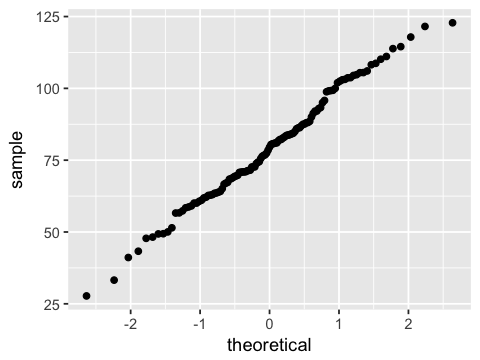

In [142]:
df <- data.frame(x=x)
ggplot(df, aes(sample=x)) + stat_qq()

In [143]:
shapiro.test(df$x)


	Shapiro-Wilk normality test

data:  df$x
W = 0.99162, p-value = 0.6905


In [145]:
var.test(x, y)


	F test to compare two variances

data:  x and y
F = 0.81959, num df = 118, denom df = 116, p-value = 0.283
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5692599 1.1793311
sample estimates:
ratio of variances 
         0.8195921 


## Exercise

In [146]:
suppressPackageStartupMessages(library(MASS))

In [147]:
data(anorexia)

In [148]:
head(anorexia)

Treat,Prewt,Postwt
Cont,80.7,80.2
Cont,89.4,80.1
Cont,91.8,86.4
Cont,74.0,86.3
Cont,78.1,76.1
Cont,88.3,78.1


In [149]:
str(anorexia)

'data.frame':	72 obs. of  3 variables:
 $ Treat : Factor w/ 3 levels "CBT","Cont","FT": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prewt : num  80.7 89.4 91.8 74 78.1 88.3 87.3 75.1 80.6 78.4 ...
 $ Postwt: num  80.2 80.1 86.4 86.3 76.1 78.1 75.1 86.7 73.5 84.6 ...


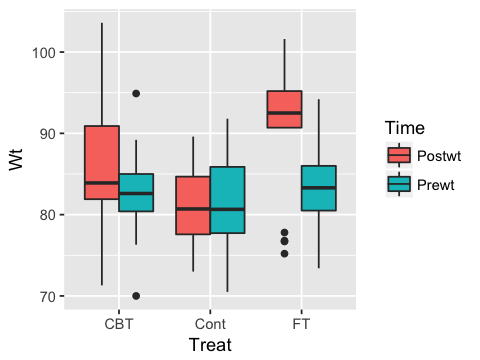

In [167]:
ggplot(anorexia %>% gather(Time, Wt, -Treat), aes(y=Wt, x=Treat, fill=Time)) + 
geom_boxplot()

**1**. There are 3 treatment groups for the anorexia data set. Calculate the confidence intervals and p-values for each treatment using the appropriate T test.

**2** Check if the normality assumptions are met for each treatment group.